In [ ]:
import numpy as np 
import pandas as pd 
#from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [ ]:
iris_data = pd.read_csv("mobile-games.csv")

In [ ]:
iris_data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             104 non-null    object
 1   Revenue          104 non-null    int64 
 2   Initial release  104 non-null    object
 3   Publisher(s)     104 non-null    object
 4   Genre(s)         104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [ ]:
iris_data.head()


,Game,Revenue,Initial release,Publisher(s),Genre(s)
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy


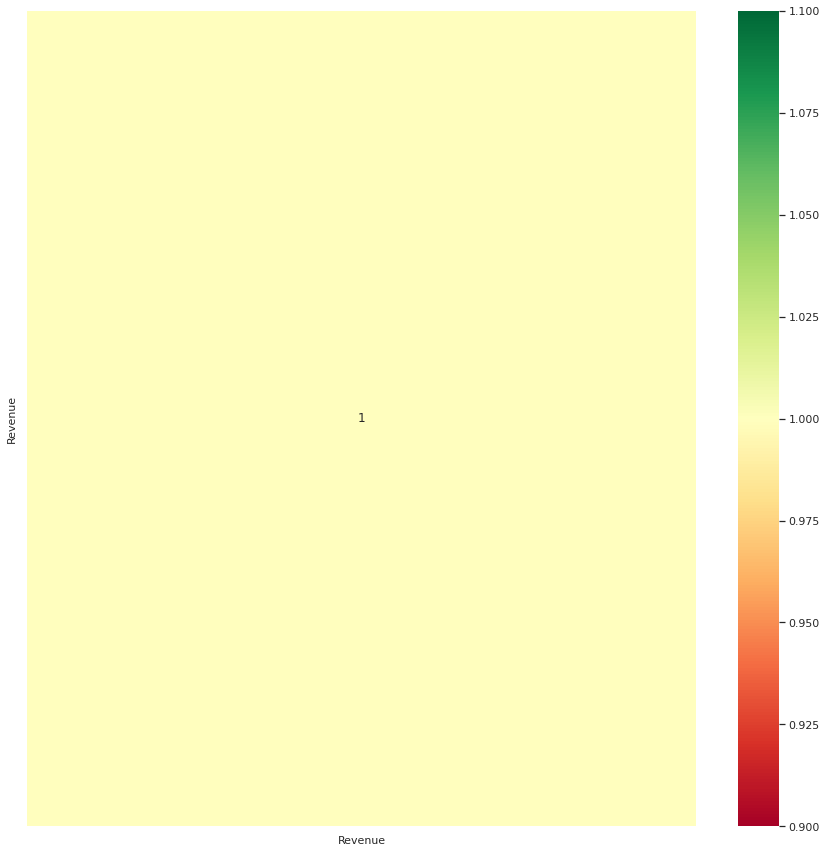

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

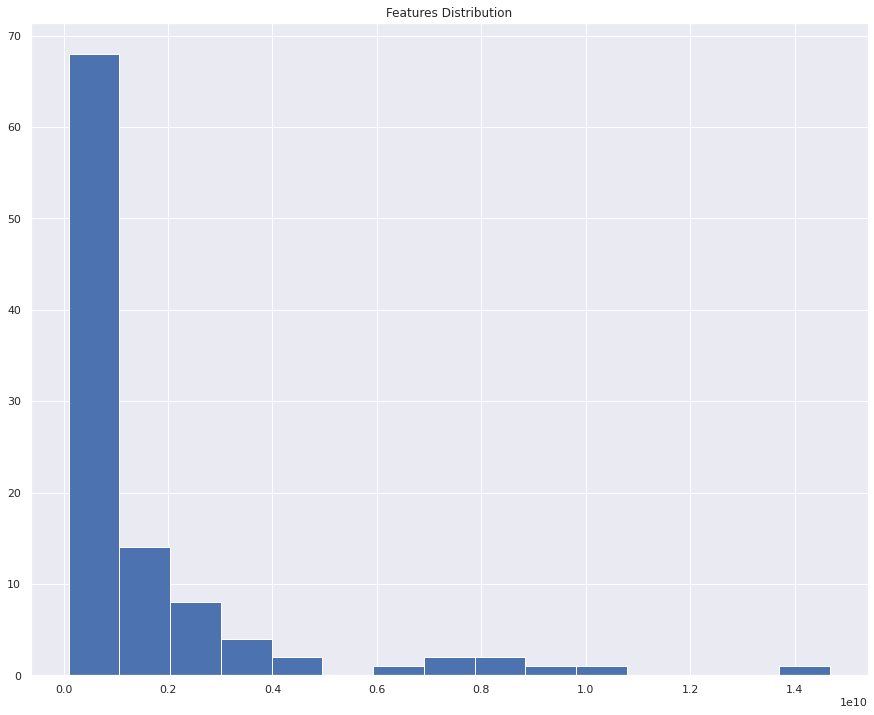

In [ ]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


In [ ]:
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

NameError: ignored